# Data Science (Zero to Hero)

# 1.0 Introduction

As a Data Science student who is undergoing my Bachelor’s Degree, I always get asked questions by many non-technical juniors and peers about Data as they unfamiliar with this subject. Whether people want to know about Data Science, or whether if they’re interested in undertaking Data Science in the future, I would like to help them understand about Data Science more. Therefore, I have chosen to tell a story about Data Science, titled “Data Science (Zero to Hero)” to help people understand more about Data Science, or to help them start their Data Science journey.

To aid my story, I have used questions from datasets which are shown below:

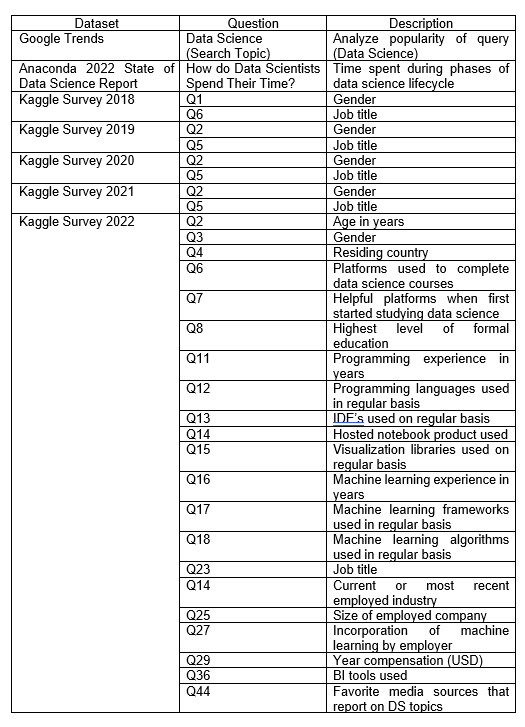

Thus, I hope that by going through the story, everyone will have a further understanding of Data Science, inspiring you to also join in on my Data Science journey. Also, all the graphs in this notebook are interactive, so feel free to hover or click on them to gain more insights.

## 1.1 What is Data Science?

According to IBM, Data Science combines statistics, programming knowledge, analytics skills, artificial intelligence, and machine learning to discover insights from data which can be used to guide decision making in organizations. In this section, the rising popularity of Data Science and what Data Scientists do will be covered.

### 1.1.1 Rise in popularity of Data Science

Data Science is a field that has grown in popularity and is becoming increasingly in demand. However, how do we measure popularity? One of the answers is to use Google Trends. Google Trends measures the popularity of a search term by normalizing the number of searches into a scale of 0-100, with a upward line showing increasing popularity.

In [1]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import numpy as np

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wie3010datavizassignment1/DS Timeline Dataset.csv
/kaggle/input/wie3010datavizassignment1/Anaconda 2022 State of DS Report.pdf
/kaggle/input/wie3010datavizassignment1/2019 Kaggle Survey Dataset.csv
/kaggle/input/wie3010datavizassignment1/2022 Kaggle Survey Dataset.csv
/kaggle/input/wie3010datavizassignment1/2018 Kaggle Survey Dataset.csv
/kaggle/input/wie3010datavizassignment1/2020 Kaggle Survey Dataset.csv
/kaggle/input/wie3010datavizassignment1/2021 Kaggle Survey Dataset.csv


In [3]:
# load trends dateset and rename columns
trends_df = pd.read_csv("/kaggle/input/wie3010datavizassignment1/DS Timeline Dataset.csv")
trends_df.columns = ['Month', 'Interest Over Time']

# create figure
fig = go.Figure()

# add scatter plot
fig.add_trace(go.Scatter(
    x = trends_df.Month,
    y = trends_df['Interest Over Time'],
    mode = "lines",
    hovertemplate = "<b>Month: </b>%{x}<br><b>Interest: </b>%{y}<extra></extra>"
))

# update the template, title and margins
fig.update_layout(
    template = "plotly_white",
    title = dict(
        text = "<b>Rise in popularity of data science</b><br><sup>Google Searches for Data Science have increased drastically in the past 10 years</sup>"
    ),
    margin_t = 80,
    width = 700,
)

# x-axis labels and y-axis labels can also be updated inside fig.update_layout
# update x-axis labels
fig.update_xaxes(
    title = "Year",
    showgrid = False
)

# update y-axis labels
fig.update_yaxes(
    title = "Interest Over Time"
)

fig.show()

It’s not surprising that Data Science is at its all-time highest popularity right now. Data Science is still regularly searched by users and only had a decrease in searches during the starting of the covid-19 lockdowns.

### 1.1.2 The Data Science Lifecycle

Before doing a deep dive analysis into the data, it is important to understand the Data Science life cycle which are the steps taken by Data Scientists during their projects. The steps are as follows:
1.	Problem Identification
2.	Business Understanding
3.	Collecting Data
4.	Cleaning Data
5.	Data Visualization
6.	Feature Engineering
7.	Model Training
8.	Model Deployment

In the Anaconda 2022 State of Data Science Report, Data Scientists were asked how much percentage of time they spent at each stage of their jobs. This allows us to understand at which stage is most time consumed.


In [4]:
# define labels and percentages
labels = ['Data Preparation & Cleaning', "Reporting & Presenation", "Data Visualization", 
          "Model Selection, Training and Deployment", "Other"]
values = [38, 16, 13, 26, 7]

#create pie chart
fig = go.Figure(
    data = go.Pie(labels = labels, values = values)
)

# update pie chart and make a hole in middle
fig.update_traces(
    hovertemplate = "<b>Stage: </b>%{label}<br><b>Percentage: </b>%{value}%",
    hoverinfo = "label+percent",
    hole = 0.5,
    textfont = dict(
        color = "black",
        size = 18,
        family = "Droid Serif"
    ),
    marker = dict(colors=['#a43725', '#e0d5bd', '#beb29e', '#E6b6a4', '#c07156'])
)

# update title of pie chart
fig.update_layout(
    title = dict(
        text = "Time Spent in Data Science Lifecycle",
        x = 0.45,
    ),
    legend_x = 0.8,
)

# annotation can also be added inside fig.updat_layout
# add annotation in the middle of the piechart
fig.add_annotation(
        text = "Data Science<br>Lifecycle",
        y = 0.5,
        x = 0.5,
        font_size = 15,
        showarrow = False
)

fig.show()

Not surprisingly, Data Preparation & Cleaning takes up the most time (38%) in the lifecycle, with Model Selection, Training and Deployment in second place (26%). This is eye-opening as many people and even schools tend to focus more on the models in Data Science, ignoring the importance of preparing and cleaning the data and how much time is needed to do so.

# 2.0 Things you need to know about the Data Science Industry

Now that we have a brief understanding of what Data Science is, let us explore interesting facts and answer some questions regarding the industry.

## 2.1 Data Analyst is Data Science in disguise?

As a Data Science student, I’m constantly asked the question “what’s the difference between a Data Scientist and a Data Analyst”. To be honest, I’m not 100% sure of the differences myself. Let’s find out the answer by analyzing the survey data on job roles.

In [5]:
# helper function to get number of counts for questions that have been split into multiple columns
def get_answer_counts(df, qn_no):
    # subset dataframe based on column name containing 
    # first way to subet
    temp_df = df.iloc[:, df.columns.str.contains(qn_no)]
    
    # second way to subset
    # regex = "^Q" + qn_no
    # temp_df = df.filter(regex = regex, axis = 1)
    
    # define empty list for counts and answer
    count_list = []
    answer_list = []
    
    # loop through each column in the dataframe
    for column in temp_df:
        # subset the column series
        columnSeries = temp_df[column]

        # drop NAN values
        columnSeries = columnSeries.dropna()
        
        # append the count and answer to the list
        count_list.append(len(columnSeries))
        answer_list.append(columnSeries.iloc[0])
        
    return pd.DataFrame(zip(answer_list, count_list), columns = ["Answer", "Count"])

In [6]:
# read kaggle dataset
df = pd.read_csv("/kaggle/input/wie3010datavizassignment1/2022 Kaggle Survey Dataset.csv")

# get data scientist dataframe only
ds_df = df[df["Q23"] == "Data Scientist"]

# get answer, count, percentage dataframe
ds_answer_df = get_answer_counts(ds_df, "28")
ds_answer_df["Percentage"] = round(ds_answer_df["Count"] / len(ds_df) * 100, 1)
ds_answer_df["Answer"] = ["Analyze data for business decisions", "Build or run the data infrastructure", 
                         "Build ML Prototypes", "Build or run ML servuces for product/workflow",
                         "Improve existing ML models", "Research that advances ML", "None", "Other"]

# get average roles for a data scientist, Q28_7 is dropped because the answer is none 
ds_avg_roles = ds_df.iloc[:, ds_df.columns.str.contains("28")].drop(["Q28_7"], axis = 1).count(axis=1).mean()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning:

Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.



In [7]:
fig = go.Figure(go.Sankey(
    node = dict(
        pad = 15,
        thickness = 15,
        line = dict(color = "black", width = 1),
        label = ["Data Scientist", "Analyze data for business decisions", "Build or run the data infrastructure", 
                "Build ML Prototypes", "Build or run ML servuces for product/workflow", "Improve existing ML models",
                "Research that advances ML", "Other"],
        color = "honeydew",
        hoverinfo = "none"
    ),
    link = dict(
        source = [0, 0, 0, 0, 0, 0, 0],
        target = [1, 2, 3, 4, 5, 6, 7],
        value = ds_answer_df["Percentage"],
        hovertemplate = "<b>Percentage: </b>%{value}<extra></extra>"
    )
))

fig.update_layout(
    title = dict(
        text = "<b>Data Scientist Roles</b><br><sup>The height of each node represents percentage of Data Scientists who perform those roles</sup>",
        y = 0.95,
        font_size = 20
    )
)

text = "Data Scientist<br> Average Roles = " + str(round(ds_avg_roles, 2))

# add average roles on top of graph
fig.add_annotation(
    text = text,
    showarrow = False,
    xref = "paper",
    x = 0.5,
    yref = "paper",
    y = 1.1,
    font_size = 12
)

fig.show()

In [8]:
# get data scientist dataframe only
da_df = df[df["Q23"] == "Data Analyst (Business, Marketing, Financial, Quantitative, etc)"]

# get answer, count, percentage dataframe
da_answer_df = get_answer_counts(da_df, "28")
da_answer_df["Percentage"] = round(da_answer_df["Count"] / len(da_df) * 100, 1)
da_answer_df["Answer"] = ["Analyze data for business decisions", "Build or run the data infrastructure", 
                         "Build ML Prototypes", "Build or run ML servuces for product/workflow",
                         "Improve existing ML models", "Research that advances ML", "None", "Other"]

# get average roles for a data scientist, Q28_7 is dropped because the answer is none 
da_avg_roles = da_df.iloc[:, da_df.columns.str.contains("28")].drop(["Q28_7"], axis = 1).count(axis=1).mean()

In [9]:
fig = go.Figure(go.Sankey(
    node = dict(
        pad = 15,
        thickness = 15,
        line = dict(color = "black", width = 1),
        label = ["Data Analyst", "Analyze data for business decisions", "Build or run the data infrastructure", 
                "Build ML Prototypes", "Build or run ML servuces for product/workflow", "Improve existing ML models",
                "Research that advances ML", "Other"],
        color = "honeydew",
        hoverinfo = "none"
    ),
    link = dict(
        source = [0, 0, 0, 0, 0, 0, 0],
        target = [1, 2, 3, 4, 5, 6, 7],
        value = da_answer_df["Percentage"],
        hovertemplate = "<b>Percentage: </b>%{value}<extra></extra>"
    )
))

fig.update_layout(
    title = dict(
        text = "<b>Data Analyst Roles</b><br><sup>The height of each node represents percentage of Data Analysts who perform those roles</sup>",
        y = 0.95,
        font_size = 20
    )
)

text = "Data Analyst<br> Average Roles = " + str(round(da_avg_roles, 2))

# add average roles on top of graph
fig.add_annotation(
    text = text,
    showarrow = False,
    xref = "paper",
    x = 0.5,
    yref = "paper",
    y = 1.1,
    font_size = 12
)

fig.show()

There are a few key points from the graphs that can be noted:
- Majority of both Data Scientists (70.3%) and Data Analysts (76.3%) have a role in analyzing data for business decisions
- Data Scientists are more involved in Machine Learning job roles compared to Data Analysts
- Data Scientists have an average of 2.84 roles per person while average roles for Data Analysts are 1.58. This means that most Data Analysts are specialized in the sense that they are assigned only 1 or 2 specific roles compared to Data Scientists who have more roles.


## 2.2 The gender disparity in data science

The Computer Science industry has a gender imbalance and consists of 83.9% males and only 16.1% females (Huang et al., 2019). Thus, I would like to analyze whether this disparity also exists in the Data Science industry.

In [10]:
# read dataset for past 5 years
df_2018 = pd.read_csv("/kaggle/input/wie3010datavizassignment1/2018 Kaggle Survey Dataset.csv")
df_2019 = pd.read_csv("/kaggle/input/wie3010datavizassignment1/2019 Kaggle Survey Dataset.csv")
df_2020 = pd.read_csv("/kaggle/input/wie3010datavizassignment1/2020 Kaggle Survey Dataset.csv")
df_2021 = pd.read_csv("/kaggle/input/wie3010datavizassignment1/2021 Kaggle Survey Dataset.csv")
df_2022 = pd.read_csv("/kaggle/input/wie3010datavizassignment1/2022 Kaggle Survey Dataset.csv")

# filter based on data scientist job role
ds_df_2018 = df_2018[df_2018["Q6"] == "Data Scientist"] # gender is qn1
ds_df_2019 = df_2019[df_2019["Q5"] == "Data Scientist"] # gender is qn2
ds_df_2020 = df_2020[df_2020["Q5"] == "Data Scientist"] # gender is qn2
ds_df_2021 = df_2021[df_2021["Q5"] == "Data Scientist"] # gender is qn2
ds_df_2022 = df_2022[df_2022["Q23"] == "Data Scientist"] # gender is qn3

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning:

Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types.Specify dtype option on import or set low_memory=False.

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning:

Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types.Specify dtype option on import or set low_memory=False.

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning:

Columns (0,195,201,285,286,287,288,289,29

In [11]:
# create gender data dataframe
gender_data = {
    "Year": np.repeat([2018, 2019, 2020, 2021, 2022], 2),
    "Gender": ["Man", "Woman", "Man", "Woman", "Man", "Woman", "Man", "Woman", "Man", "Woman"],
    "Count": [
        len(ds_df_2018[ds_df_2018["Q1"] == "Male"]),
        len(ds_df_2018[ds_df_2018["Q1"] == "Female"]),
        len(ds_df_2019[ds_df_2019["Q2"] == "Male"]),
        len(ds_df_2019[ds_df_2019["Q2"] == "Female"]),
        len(ds_df_2020[ds_df_2020["Q2"] == "Man"]),
        len(ds_df_2020[ds_df_2020["Q2"] == "Woman"]),
        len(ds_df_2021[ds_df_2021["Q2"] == "Man"]),
        len(ds_df_2021[ds_df_2021["Q2"] == "Woman"]),
        len(ds_df_2022[ds_df_2022["Q3"] == "Man"]),
        len(ds_df_2022[ds_df_2022["Q3"] == "Woman"])
    ]
}

gender_df = pd.DataFrame(gender_data)

In [12]:
# calculate total for each year
gender_values = [
    (gender_df.iloc[0, 2] + gender_df.iloc[1, 2]), # total male + female for 2018
    (gender_df.iloc[2, 2] + gender_df.iloc[3, 2]), # 2019
    (gender_df.iloc[4, 2] + gender_df.iloc[5, 2]), # 2020
    (gender_df.iloc[6, 2] + gender_df.iloc[7, 2]), # 2021
    (gender_df.iloc[8, 2] + gender_df.iloc[9, 2])  # 2022
]

# add male + female counts respectively for each year values to the list
gender_values.extend(gender_df["Count"].tolist())

In [13]:
fig = go.Figure()

fig.add_trace(go.Sunburst(
    # unique id to differentiate each sector
    ids = 
    [
        "2018", "2019", "2020", "2021", "2022", 
        "2018 - Man", "2018 - Woman", 
        "2019 - Man", "2019 - Woman", 
        "2020 - Man", "2020 - Woman", 
        "2021 - Man", "2021 - Woman", 
        "2022 - Man", "2022 - Woman", 
    ],
    # labels shown for each sector
    labels =
    [
        "2018", "2019", "2020", "2021", "2022", 
        "Man", "Woman",
        "Man", "Woman",
        "Man", "Woman",
        "Man", "Woman",
        "Man", "Woman",
    ],
    # parent for each sector
    parents =
    [
        "", "", "", "", "",
        "2018", "2018",
        "2019", "2019",
        "2020", "2020",
        "2021", "2021",
        "2022", "2022",
    ],
    # the list of gender values calculated
    values = gender_values,
    
    # branch values total makes the width of the parent sector equal to its total
    branchvalues = "total",
    
    # text shown when hover, <extra></extra> removes the trace word
    hovertemplate='<b>%{label}</b><br>Total: %{value} <extra></extra>',
))

fig.update_layout(
    title = dict(
        text = "<b>Gender among Data Scientists<br></b><sup>There is a big gap in gender representation in the DS community</sup>",
        x = 0.5,
        font_size = 18
    )
)

fig.show()

From the graph, in can be seen that there is a clear disparity of genders among Data Scientists from data collected through the Kaggle surveys from the past 5 years. Hopefully, as time passes on the number of women in the industry will increase as more women are exposed to the industry.

## 2.3 Age groups of data scientists and how education affects it

Now, let’s explore the age groups among the Data Scientists while also looking at their education levels.

In [14]:
# get sorted age group
x = np.sort(ds_df["Q2"].unique())

# create list of man and woman to store total for each age group
man_count = []
woman_count = []

for age in x:
    # filter by age
    temp_df = ds_df[ds_df["Q2"] == age]
    
    # create man and woman dataframe and append length into list created 
    man_df = temp_df[temp_df["Q3"] == "Man"]
    woman_df = temp_df[temp_df["Q3"] == "Woman"]
    man_count.append(len(man_df))
    woman_count.append(len(woman_df))

In [15]:
# create figure
fig = go.Figure()

# add male bar
fig.add_trace(go.Bar(
    x = x,
    y = man_count,
    name = "Male",
    marker_color = "royalblue",
    hovertemplate = "<b>Gender: </b>Male<br><b>Age Group: </b> %{x} <br><b>Count: </b> %{y}<br><extra></extra>"
))

# add female bar
fig.add_trace(go.Bar(
    x = x,
    y = woman_count,
    name = "Female",
    marker_color = "lightcoral",
    hovertemplate = "<b>Gender: </b>Female<br><b>Age Group: </b> %{x} <br><b>Count: </b> %{y}<br><extra></extra>"
))

# update layout to stack bar chart
fig.update_layout(
    barmode = "stack",
    template = "plotly_white",
    title = "Age groups among Data Scientists",
    yaxis = dict(
        title = "No. of people",
    ),
    legend = dict(
        x = 0.9
    )
)

fig.add_annotation(
    text = "The majority age group is here",
    arrowhead = 4,
    arrowwidth = 2,
    xref = "paper",
    x = 0.226,
    yref = "paper",
    yanchor = "bottom",
    y = 0.95,
    ax = 0, # ax and ay controls the direction of the arrow body/tail with respect to x and y axis
    ay = -20,
    borderpad = 8 # borderpad adds space between the arrow and text
)

fig.add_annotation(
    text = "The minority age <br>group is here<br>(exclude 70+ group)",
    width = 200,
    arrowhead = 4,
    arrowwidth = 2,
    x = 0.045,
    xref = "paper",
    yref = "paper",
    yanchor = "bottom",
    y = 0.05,
    ax = 40,
    ay = -150,
    borderpad = 8
)

fig.show()

In [16]:
# get education group and rearrange the array
education_group = ds_df["Q8"].unique()
index = [6, 5, 0, 2, 1, 3, 4]
education_group = education_group[index]

# create empty list to record number of Data Scientists for each group
edu_list = []

for education in education_group:
    temp_df = ds_df[ds_df["Q8"] == education]
    edu_list.append(len(temp_df))

# calculate percentage
edu_list = [round(x / 1929 * 100, 1) for x in edu_list]

"""
Another way to calculate percentage using value counts

education = ds_df["Q8"].value_counts().rename_axis("Education").reset_index(name = "counts")
index = [3, 5, 6, 1, 0, 2, 4]
education = education.reindex(index)
education["Percentage"] = round(education["counts"] / education["counts"].sum() * 100, 1)
"""

'\nAnother way to calculate percentage using value counts\n\neducation = ds_df["Q8"].value_counts().rename_axis("Education").reset_index(name = "counts")\nindex = [3, 5, 6, 1, 0, 2, 4]\neducation = education.reindex(index)\neducation["Percentage"] = round(education["counts"] / education["counts"].sum() * 100, 1)\n'

In [17]:
fig = go.Figure(go.Scatter(
    x = education_group,
    y = edu_list,
    mode = "markers+lines",
    fill = "tozeroy",
    hovertemplate = "<b>Percentage:</b> %{y}%<extra></extra>"
))

fig.update_yaxes(
    title = "Percentage"
)

fig.update_layout(
    width = 950,
    height = 700,
    template = "simple_white",
    title = dict(
        text = "<b>Distribution of highest education levels of Data Scientists</b><br><sup>Over 50% have a Master's Degree</sup>",
        x = 0.5
    )
)

fig.show()

From the graphs, the majority of Data Scientists are in the 25 – 29 years old age group, with the total number subsequently decreasing for further older age groups. The minority age group is 18 – 21 years old, excluding 70+ age group as most people at that age are already retired.

Over 50% of Data Scientists also have their Master’s Degree, followed by Bachelor’s Degree in second (21%) and Doctoral Degree in third (17%). The education levels, the rising popularity of Data Science and also the age groups may all be connected as the 25 – 29 age group are the ages where most people pursue their Master’s Degree. Followed by the increasing popularity of Data Science among recent years, it’s probable that many young people are following the trends nowadays.

So, if you’re looking into joining the Data Science industry, it would be a good idea to go for further education and get your Master’s Degree, proved by the fact that majority of Data Scientists have theirs’. 


## 2.4 Does Data Science really pay well?

Data Science is seen as a profession that pays very well. Is this a fact or a myth? Let’s find out together.

### 2.4.1 Comparing Data Scientists with other professions

Firstly, I would like to compare the yearly compensation of a Data Scientist with other relevant that are similar to Data Science such as Data Analyst and Machine Learning Engineer. I’ve also added Software Engineering because I’ve seen many YouTube videos where people talked about their pay in various companies and I was just curious. 

The data is also subset into countries to handle the bias in pay, as living wages across all countries are different. The 3 countries chosen were Japan, USA and India as they had the highest number of people in those job roles.


In [18]:
# do boxplot of 3 countries, with 5 profession in each country

# job lists to be considered and get dataframe containing those jobs
job_list = ['Data Scientist', 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
       'Software Engineer', 'Research Scientist', 'Machine Learning/ MLops Engineer']

job_df = df.loc[df['Q23'].isin(job_list), :]

# define earning map
earnings_map ={
 '$0-999': 500,
 '100,000-124,999': 112500,
 '10,000-14,999': 12500,
 '1,000-1,999': 1500,
 '40,000-49,999': 45000,
 '30,000-39,999': 35000,
 '50,000-59,999': 55000,
 '5,000-7,499': 6250,
 '15,000-19,999': 17500,
 '70,000-79,999': 75000,
 '60,000-69,999': 65000,
 '20,000-24,999': 22500,
 '150,000-199,999': 175000,
 '7,500-9,999': 8650,
 '125,000-149,999': 137500,
 '2,000-2,999': 2500,
 '25,000-29,999': 27500,
 '90,000-99,999': 95000,
 '80,000-89,999': 85000,
 '4,000-4,999': 4500,
 '3,000-3,999': 3500,
 '200,000-249,999': 225000,
 '300,000-500,000': 400000,
 '250,000-299,999': 275000,
 '$500,000-999,999': 750000,
 '>$1,000,000' : 1100000
}

# get dataframe from each country containing the 5 considered jobs
india_df = job_df[job_df["Q4"] == "India"]
usa_df = job_df[job_df["Q4"] == "United States of America"]
japan_df = job_df[job_df["Q4"] == "Japan"]

In [19]:
# subset each job for JP
ds_japan_df = japan_df[japan_df['Q23'] == "Data Scientist"]
da_japan_df = japan_df[japan_df['Q23'] == "Data Analyst (Business, Marketing, Financial, Quantitative, etc)"]
se_japan_df = japan_df[japan_df['Q23'] == "Software Engineer"]
ml_japan_df = japan_df[japan_df['Q23'] == "Machine Learning/ MLops Engineer"]

# drop the rows with empty values in Q29 (yearly compensation)
ds_japan_df = ds_japan_df.dropna(subset = ["Q29"], axis = 0)
da_japan_df = da_japan_df.dropna(subset = ["Q29"], axis = 0)
se_japan_df = se_japan_df.dropna(subset = ["Q29"], axis = 0)
ml_japan_df = ml_japan_df.dropna(subset = ["Q29"], axis = 0)

# map the earnings to bins
ds_japan_df['Q29'] = ds_japan_df['Q29'].map(earnings_map)
da_japan_df['Q29'] = da_japan_df['Q29'].map(earnings_map)
se_japan_df['Q29'] = se_japan_df['Q29'].map(earnings_map)
ml_japan_df['Q29'] = ml_japan_df['Q29'].map(earnings_map)

In [20]:
# subset each job for USA
ds_usa_df = usa_df[usa_df['Q23'] == "Data Scientist"]
da_usa_df = usa_df[usa_df['Q23'] == "Data Analyst (Business, Marketing, Financial, Quantitative, etc)"]
se_usa_df = usa_df[usa_df['Q23'] == "Software Engineer"]
ml_usa_df = usa_df[usa_df['Q23'] == "Machine Learning/ MLops Engineer"]

# drop the rows with empty values in Q29 (yearly compensation)
ds_usa_df = ds_usa_df.dropna(subset = ["Q29"], axis = 0)
da_usa_df = da_usa_df.dropna(subset = ["Q29"], axis = 0)
se_usa_df = se_usa_df.dropna(subset = ["Q29"], axis = 0)
ml_usa_df = ml_usa_df.dropna(subset = ["Q29"], axis = 0)

# map the earnings to bins
ds_usa_df['Q29'] = ds_usa_df['Q29'].map(earnings_map)
da_usa_df['Q29'] = da_usa_df['Q29'].map(earnings_map)
se_usa_df['Q29'] = se_usa_df['Q29'].map(earnings_map)
ml_usa_df['Q29'] = ml_usa_df['Q29'].map(earnings_map)

In [21]:
# subset each job for india
ds_india_df = india_df[india_df['Q23'] == "Data Scientist"]
da_india_df = india_df[india_df['Q23'] == "Data Analyst (Business, Marketing, Financial, Quantitative, etc)"]
se_india_df = india_df[india_df['Q23'] == "Software Engineer"]
ml_india_df = india_df[india_df['Q23'] == "Machine Learning/ MLops Engineer"]

# drop the rows with empty values in Q29 (yearly compensation)
ds_india_df = ds_india_df.dropna(subset = ["Q29"], axis = 0)
da_india_df = da_india_df.dropna(subset = ["Q29"], axis = 0)
se_india_df = se_india_df.dropna(subset = ["Q29"], axis = 0)
ml_india_df = ml_india_df.dropna(subset = ["Q29"], axis = 0)

# map the earnings to bins
ds_india_df['Q29'] = ds_india_df['Q29'].map(earnings_map)
da_india_df['Q29'] = da_india_df['Q29'].map(earnings_map)
se_india_df['Q29'] = se_india_df['Q29'].map(earnings_map)
ml_india_df['Q29'] = ml_india_df['Q29'].map(earnings_map)

In [22]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=3, 
    cols=1, 
    subplot_titles=("Japan", "USA", "India"),
    vertical_spacing = 0.08
)

# Japan
fig.add_trace(go.Box(
    y = ds_japan_df['Q29'],
    name = "DS",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=1, col=1)

fig.add_trace(go.Box(
    y = da_japan_df['Q29'],
    name = "DA",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=1, col=1)

fig.add_trace(go.Box(
    y = se_japan_df['Q29'],
    name = "SE",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=1, col=1)

fig.add_trace(go.Box(
    y = ml_japan_df['Q29'],
    name = "ML",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=1, col=1)

# USA
fig.add_trace(go.Box(
    y = ds_usa_df['Q29'],
    name = "DS",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=2, col=1)

fig.add_trace(go.Box(
    y = da_usa_df['Q29'],
    name = "DA",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=2, col=1)

fig.add_trace(go.Box(
    y = se_usa_df['Q29'],
    name = "SE",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=2, col=1)

fig.add_trace(go.Box(
    y = ml_usa_df['Q29'],
    name = "ML",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=2, col=1)


# India
fig.add_trace(go.Box(
    y = ds_india_df['Q29'],
    name = "DS",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=3, col=1)

fig.add_trace(go.Box(
    y = da_india_df['Q29'],
    name = "DA",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=3, col=1)

fig.add_trace(go.Box(
    y = se_india_df['Q29'],
    name = "SE",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=3, col=1)

fig.add_trace(go.Box(
    y = ml_india_df['Q29'],
    name = "ML",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=3, col=1)

fig.update_layout(
    template = "plotly_white",
    height = 1500,
    showlegend = False,
    title = dict(
        text = "Yearly Compensation (USD) for jobs across 3 countries",
        x = 0.5
    )
)

# update y axis title for all subplots
fig.update_yaxes(title_text="Yearly Compensation (USD)", row=1, col=1)
fig.update_yaxes(title_text="Yearly Compensation (USD)", row=2, col=1)
fig.update_yaxes(title_text="Yearly Compensation (USD)", row=3, col=1)

fig.show()

From the graphs, there seem to be a few extreme outliers in Japan and India. I’ll proceed by removing them and replot the graph to see if it looks better.

In [23]:
# removing outliers
ds_india_df['Q29'] = ds_india_df.loc[~ds_india_df["Q29"].isin([750000, 1100000])]["Q29"]
da_india_df['Q29'] = da_india_df.loc[~da_india_df["Q29"].isin([750000, 1100000])]["Q29"]
se_india_df['Q29'] = se_india_df.loc[~se_india_df["Q29"].isin([750000, 1100000])]["Q29"]
ml_india_df['Q29'] = ml_india_df.loc[~ml_india_df["Q29"].isin([750000, 1100000])]["Q29"]

ds_japan_df['Q29'] = ds_japan_df.loc[ds_japan_df["Q29"] != 1100000]["Q29"]
da_japan_df['Q29'] = da_japan_df.loc[da_japan_df["Q29"] != 1100000]["Q29"]
se_japan_df['Q29'] = se_japan_df.loc[se_japan_df["Q29"] != 1100000]["Q29"]
ml_japan_df['Q29'] = ml_japan_df.loc[ml_japan_df["Q29"] != 1100000]["Q29"]

In [24]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=3, 
    cols=1, 
    subplot_titles=("Japan", "USA", "India"),
    vertical_spacing = 0.08
)

# Japan
fig.add_trace(go.Box(
    y = ds_japan_df['Q29'],
    name = "DS",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=1, col=1)

fig.add_trace(go.Box(
    y = da_japan_df['Q29'],
    name = "DA",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=1, col=1)

fig.add_trace(go.Box(
    y = se_japan_df['Q29'],
    name = "SE",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=1, col=1)

fig.add_trace(go.Box(
    y = ml_japan_df['Q29'],
    name = "ML",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=1, col=1)

# USA
fig.add_trace(go.Box(
    y = ds_usa_df['Q29'],
    name = "DS",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=2, col=1)

fig.add_trace(go.Box(
    y = da_usa_df['Q29'],
    name = "DA",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=2, col=1)

fig.add_trace(go.Box(
    y = se_usa_df['Q29'],
    name = "SE",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=2, col=1)

fig.add_trace(go.Box(
    y = ml_usa_df['Q29'],
    name = "ML",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=2, col=1)


# India
fig.add_trace(go.Box(
    y = ds_india_df['Q29'],
    name = "DS",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=3, col=1)

fig.add_trace(go.Box(
    y = da_india_df['Q29'],
    name = "DA",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=3, col=1)

fig.add_trace(go.Box(
    y = se_india_df['Q29'],
    name = "SE",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=3, col=1)

fig.add_trace(go.Box(
    y = ml_india_df['Q29'],
    name = "ML",
    hoverinfo = "y",
    hovertemplate = "<b>Suspected outlier: </b>%{y}<extra></extra>"
), row=3, col=1)

fig.update_layout(
    template = "plotly_white",
    height = 1500,
    showlegend = False,
    title = dict(
        text = "Yearly Compensation (USD) for jobs across 3 countries after removing outliers",
        x = 0.5
    )
)

# update y axis title for all subplots
fig.update_yaxes(title_text="Yearly Compensation (USD)", row=1, col=1)
fig.update_yaxes(title_text="Yearly Compensation (USD)", row=2, col=1)
fig.update_yaxes(title_text="Yearly Compensation (USD)", row=3, col=1)

fig.show()

Again, there are a few key points that can be taken from the graph:
- Data Analysts have either the lowest or joint-lowest median salary for all 3 countries
- Both Data Scientists and Machine Learning Engineers have the top or joint-top median salary for 2/3 countries each

Thus, Data Science indeed does really pay well, even when compared with other similar professions.


### 2.4.2 Do bigger companies pay data scientists more?

Besides job titles, the yearly compensation of Data Scientists is affected by the size of the company. Bigger companies will certainly pay more, right? Let’s find out the truth. The same 3 countries used just now were used again for convenience purposes.

In [25]:
# get dataframe of company size
company_size = pd.DataFrame(ds_df["Q25"].unique(), columns = ['Company Size']).dropna()
company_size = company_size.reindex([0, 2, 5, 1, 4])

In [26]:
jp_earnings = []
usa_earnings = []
india_earnings = []

# get the average earnings based on company size for data scientists across jp, usa ,india
for index, row in company_size.iterrows():
    temp_df = ds_japan_df[ds_japan_df["Q25"].str.contains(row["Company Size"])]
    jp_earnings.append(round(temp_df['Q29'].mean(), 0))
    
    temp_df = ds_usa_df[ds_usa_df["Q25"].str.contains(row["Company Size"])]
    usa_earnings.append(round(temp_df['Q29'].mean(), 0))
    
    temp_df = ds_india_df[ds_india_df["Q25"].str.contains(row["Company Size"])]
    india_earnings.append(round(temp_df['Q29'].mean(), 0))

# add the first earning again for plotting purposes
jp_earnings.append(jp_earnings[0])
india_earnings.append(india_earnings[0])
usa_earnings.append(usa_earnings[0])

In [27]:
theta = ["0-49", "50-249", "250-999", "1000-9999", ">10000", "0-49"]

fig = make_subplots(
    rows=1, 
    cols=3, 
    subplot_titles=("Japan", "USA", "India"),
    specs=[[{'type': 'polar'}, {'type': 'polar'}, {'type': 'polar'}]],
    horizontal_spacing = 0.15
)

fig.add_trace(go.Scatterpolar(
    theta = theta,
    r = jp_earnings,
    fill = "tonext",
    hovertemplate = "<b>Japan</b><br><b>Size: </b>%{theta}<br><b>Mean Wage: </b>%{r}<extra></extra>",
    name = "Japan",
), row = 1, col = 1)

fig.add_trace(go.Scatterpolar(
    theta = theta,
    r = usa_earnings,
    fill = "tonext",
    hovertemplate = "<b>USA</b><br><b>Size: </b>%{theta}<br><b>Mean Wage: </b>%{r}<extra></extra>",
    name = "USA"
), row = 1, col = 2)

fig.add_trace(go.Scatterpolar(
    theta = theta,
    r = india_earnings,
    fill = "tonext",
    hovertemplate = "<b>India</b><br><b>Size: </b>%{theta}<br><b>Mean Wage: </b>%{r}<extra></extra>",
    name = "India"
), row = 1, col = 3)

fig.update_layout(
    template = "simple_white",
    title = dict(
        text = "Average wage of Data Scientists based on company size",
        x = 0.5
    )
)

fig.update_annotations(
    yshift = -30
)

fig.show()

The statement might hold some truth as across all 3 countries, the average salary of a Data Scientist was highest at companies with the biggest size (>10000). However, in certain situations, there are uncertainties such as in Japan and USA, companies of sizes 0 – 49 companies paid more than companies of sizes 50 – 249. In India, Data Scientists at companies with sizes 50 – 249 earned significantly more compared to 250 – 999. However, besides the mentioned outliers, the data generally follows a trend where bigger companies tend to pay more.

In short, bigger companies generally have the leverage to pay more because they have more funds compared to smaller companies. So, if you to be the cream of the top among Data Scientists in terms of salary, it may be a good idea to aim for big companies such as FAANG.

# 3.0 The technical side of the Data Science industry 

Now that we have a good understanding of Data Science and a rough understanding of the Data Science industry, let’s jump into the technical side of the Data Science Industry

## 3.1 Technical experience

In this section, the technical experience of Data Scientists will be analyzed and they will be grouped according to their age groups. This allows us to understand the amount of experience that people generally have at each age group, instead of calculating the average across the board.

### 3.1.1 How much programming skills is needed?

First, we will take a look on the programming experiences of Data Scientists.

In [28]:
age_group = np.sort(ds_df["Q2"].unique())

# create numpy array for programming experience
programming_experience = ds_df['Q11'].unique()
index = [6, 3, 4, 2, 1, 0, 5]
programming_experience = programming_experience[index]

# create empty dataframe for programming experience based on age
columns = ["Programming Experience", '18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '50-54', '55-59', '60-69', '70+']

# create empty dataframe
age_programming_df = pd.DataFrame(columns = columns)

# fill in the empty dataframe
for experience in programming_experience:
    
    # filter by age
    temp_df = ds_df[ds_df["Q11"] == experience]
    
    # create a list with age as first element in the list
    list = [experience]
    
    # fill in the list based on values of programming experience
    for age in age_group:
        temp_df_2 = temp_df[temp_df["Q2"] == age]
        list.append(len(temp_df_2))
    
    # append the list to the dataframe
    age_programming_df.loc[len(age_programming_df)] = list
    
# set index of the dataframe to age group for plotting purposes
age_programming_df = age_programming_df.set_index("Programming Experience")

In [29]:
# create figure
fig = go.Figure(data = go.Heatmap(
    # y axis as age, x axis as education, z for each values in the dataframe corresponding to x and y
    x = age_group,
    y = programming_experience,
    z = age_programming_df.values.tolist(),
    # insert text on the heatmap
    text = age_programming_df.values.tolist(), 
    texttemplate = "%{text}",
    textfont_size = 11,
    # set color for heatmap
    colorscale = "YlOrRd"
))

fig.update_layout(
    width = 950,
    height = 700,
    template = "simple_white",
    title = dict(
        text = "Programming experience by age groups of Data Scientists",
        x = 0.53
    )
)

# update hover text
fig.update_traces(
    hovertemplate = "<b>Experience:</b> %{y}<br><b>Age: </b>%{x}<br><b>Count: </b>%{z}<extra></extra>"
)

fig.show()

As we go through the graph, it can be seen that the highest numbers follow a diagonal path across the heatmap, this is because as the age of Data Scientists increases, their experience also increases. For Data Scientists between ages 25 – 29, majority had 1 – 5 years of coding experience. This fits the age group well as they the experience that they have is within the range of an average student.

### 3.1.2 How much experience in machine learning do data scientists have?

Machine Learning is an integral part of Data Science, this is well proven by the fact that Data Scientists also carry Machine Learning roles in their jobs as shown just now. Thus, let us have a look on their Machine Learning experiences.

In [30]:
# create numpy array for ml experience
ml_experience = ds_df['Q16'].unique()

# drop nan as nan is given for people with no coding experience
ml_experience = ml_experience[~pd.isnull(ml_experience)]

# reorder the array
index = [4, 0, 2, 6, 3, 1, 5, 7]
ml_experience = ml_experience[index]

# create empty dataframe for programming experience based on age
columns = ["ML Experience", '18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '50-54', '55-59', '60-69', '70+']
ml_age_df = pd.DataFrame(columns = columns)

# fill in the empty dataframe
for experience in ml_experience:
    
    # filter by experience
    temp_df = ds_df[ds_df["Q16"] == experience]
    
    # create a list with experience as first element in the list
    list = [experience]
    
    # fill in the list based on values of ml experience
    for age in age_group:
        temp_df_2 = temp_df[temp_df["Q2"] == age]
        list.append(len(temp_df_2))
    
    # append the list to the dataframe
    ml_age_df.loc[len(ml_age_df)] = list
    
# set index of the dataframe to age group for plotting purposes
ml_age_df = ml_age_df.set_index("ML Experience")

In [31]:
# create figure
fig = go.Figure(data = go.Heatmap(
    # y axis as age, x axis as education, z for each values in the dataframe corresponding to x and y
    x = age_group,
    y = ['<1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-20 years','Do not use'],
    z = ml_age_df.values.tolist(),
    # insert text on the heatmap
    text = ml_age_df.values.tolist(), 
    texttemplate = "%{text}",
    textfont_size = 11,
    # set color for heatmap
    colorscale = "ylgnbu"
))

fig.update_layout(
    width = 950,
    height = 700,
    template = "simple_white",
    title = dict(
        text = "Machine Learning experience by age groups of Data Scientists",
        x = 0.5
    )
)

# update hover text
fig.update_traces(
    hovertemplate = "<b>Experience:</b> %{y}<br><b>Age: </b>%{x}<br><b>Count: </b>%{z}<extra></extra>"
)

fig.show()

The definition of experience in Machine Learning may differ from one person to another as 1 year of experience may result in a huge gap in skill, depending on how much time was devoted, how much Machine Learning was used hands-on and so on so forth.

Generally, the majority of people between 22 – 29 have 1 – 3 years of experience in Machine Learning, which is very reasonable and achievable for students too as Machine Learning is not an easy topic to dive into.


## 3.2 What skills and tools should I learn?

Let’s deep dive into the skills and tools that are needed and used by Data Scientists.

### 3.2.1 Programming languages, IDE's and environments

In [32]:
# get programming language dataframe, sort by usage and take top 10, then calculate percentage
programming_language = get_answer_counts(ds_df, "Q12")
programming_language = programming_language.sort_values(by = "Count", ascending = False).iloc[:10, :]
programming_language["Percentage"] = round(programming_language["Count"] / len(ds_df) * 100, 1)

# get ide and notebook df, combine, sort by usage, drop none, and then calculate percentage
ide = get_answer_counts(ds_df, "Q13")
notebook = get_answer_counts(ds_df, "Q14")
ide_notebook = pd.concat([ide, notebook])
ide_notebook = ide_notebook.sort_values(by = "Count", ascending = False)
ide_notebook = ide_notebook[ide_notebook["Answer"].str.contains("None") == False].iloc[:10, :]
ide_notebook["Percentage"] = round(ide_notebook["Count"] / len(ds_df) * 100, 1)

In [33]:
fig = make_subplots(
    rows = 1,
    cols = 2,
    horizontal_spacing = 0.25
)

fig.add_trace(go.Bar(
    y = programming_language["Answer"],
    x = programming_language["Percentage"],
    orientation = 'h',
    hovertemplate = "<b>Percentage</b><extra></extra>",
    texttemplate = "%{x}" + "%",
    marker_color = "lightsteelblue"
), row = 1, col = 1)

fig.add_trace(go.Bar(
    y = ide_notebook["Answer"],
    x = ide_notebook["Percentage"],
    orientation = 'h',
    hovertemplate = "<b>Percentage</b><extra></extra>",
    texttemplate = "%{x}" + "%",
    marker_color = "aquamarine"
), row = 1, col = 2)

fig.update_yaxes(
    autorange = "reversed",
    row = 1
)

fig.update_xaxes(
    title = dict(
        text = "Percentage"
    ),
    row = 1
)

fig.update_layout(
    showlegend = False,
    template = "plotly_white",
    title = dict(
        text = "<b>Top programming languages and IDE/Notebooks used by Data Scientists</b>" + 
                "<br><sup>The length of the bar shows the percentage of usage among Data Scientists</sup>",
        x = 0.5
    )
)

fig.show()

The top programming language used by Data Scientists is Python by a landslide with 93.7% of Data Scientists using it. Coming at second is SQL with 59.1% followed by R with 27.5%. 

**Python**:<br>
Generally used due to it having many libraries for data analysis and machine learning 

**SQL**:<br>
Data Preparation is an integral part of Data Science and SQL is needed for that to load and query data from databases.

**R**:<br>
R is a statistical language normally used for statistical computations.

Moving on, the top 3 environments to code with are Jupyter Notebooks, Colab Notebooks and VSCode. Its’ best to familiarize yourself with Notebooks as they are widely used across the Data Science industry. VSCode is also a go-to IDE as it has native support for Jupyter Notebooks.


### 3.2.2 Machine Learning

In [34]:
# get answers and frequency of each answer for ML framework and algorithm
ml_framework = get_answer_counts(ds_df, "Q17")
ml_algo = get_answer_counts(ds_df, "Q18")

# rename the algorithm
ml_algo["Answer"] = ["Linear/Logsitic Regression", "Decision Tree/Random Forest", "Gradient Boosting Machine", 
                     "Bayesian Approaches", "Evolutionary Approaches", "Dense Neural Networks", "Convolutional Neural Networks",
                    "Generative Adversarial Networks", "Recurrent Neural Networks", "Transformer Networks",
                    "Autoencoder Networks", "Graph Neural Networks", "None", "Other"]

In [35]:
# get framework labels for treemap
ml_framework_list = ["Framework"]
temp = ml_framework["Answer"].tolist()
ml_framework_list.extend(temp)
# remove leading and trailing whitespaces
ml_framework_list = [x.strip() for x in ml_framework_list]

# get framework parent list for treemap
parent_list = [""]
parent_list.extend(["Framework"] * 15)

# get algo labels for treemap
ml_algo_list = ["Algorithm"]
temp = ml_algo["Answer"].tolist()
ml_algo_list.extend(temp)
# remove leading and trailing whitespaces
ml_algo_list = [x.strip() for x in ml_algo_list]

# get algo parents for treemap
parent_list_2 = [""]
parent_list_2.extend(["Algorithm"] * 14)

In [36]:
# get treemap values for framework
sum = ml_framework["Count"].sum()
value_list = [sum]
values = ml_framework["Count"].tolist()
value_list.extend(values)

# get treemap values for algo
sum = ml_algo["Count"].sum()
value_list_2 = [sum]
values = ml_framework["Count"].tolist()
value_list_2.extend(values)

In [37]:
fig = make_subplots(
    rows = 2,
    cols = 1,
    specs = [[{'type': 'treemap'}], [{'type': 'treemap'}]],
    subplot_titles = ["Frameworks", "Algorithm"],
    vertical_spacing = 0.04
)

# plot first treemap
fig.add_trace(go.Treemap(
    labels = ml_framework_list,
    parents = parent_list,
    values = value_list,
    branchvalues = "total",
    texttemplate = "%{label}<br>Count: %{value}",
    hovertemplate = "%{label}<br>%{value}<extra></extra>",
    marker_colorscale = "deep"
), row = 1, col = 1)

# plot second treemap
fig.add_trace(go.Treemap(
    labels = ml_algo_list,
    parents = parent_list_2,
    values = value_list_2,
    branchvalues = "total",
    texttemplate = "%{label}<br>Count: %{value}",
    hovertemplate = "%{label}<br>%{value}<extra></extra>",
    marker_colorscale = "dense"
), row = 2, col = 1)

fig.update_layout(
    height = 1400,
    title = dict(
        text = "Machine Learning Frameworks and Algorithms used by Data Scientists",
        x = 0.5
    )
)

fig.show()

A few takeaways from the graph:
- Scikit-learn is by far the most popular Machine Learning framework
- For gradient boosting algorithms, XGBoost is preferred compared to CatBoost and LightGBM
- Most used Machine Learning algorithm is linear/logistic regression, although other algorithms such as dense neural networks and decision trees also have large uses among Data Scientists

### 3.2.3 Tools to analyze data

In [38]:
# get visualization tools answer and frequency then calculate percentage
viz_df = get_answer_counts(ds_df, "Q15")
viz_df = viz_df[~viz_df["Answer"].str.contains("None")]
viz_df = viz_df.sort_values(by = "Count", ascending = False)
viz_df["Percentage"] = round(viz_df["Count"] / len(ds_df) * 100, 2)

bi_df = get_answer_counts(ds_df, "Q36")
bi_df = bi_df[~bi_df["Answer"].str.contains("None")]
bi_df = bi_df.sort_values(by = "Count", ascending = False)
bi_df["Percentage"] = round(bi_df["Count"] / len(ds_df) * 100, 2)

In [39]:
# define colors for plot
from plotly.colors import n_colors

# color is light then dark
colors = n_colors('rgb(141, 230, 255)', 'rgb(75, 103, 228)', 14, colortype='rgb')

# define list of containing number from 13 to 0 (total 14) because got 14 rows
a = [13,12,11,10,9,8,7,6,5,4,3,2,1,0]

fig = make_subplots(
    rows = 1,
    cols = 2,
    specs = [[{"type": "table"}, {"type": "table"}]]
)

fig.add_trace(go.Table(
    header = dict(
        values = ["Visualization Tools", "Percentage"],
        font = dict(
            size = 15
        ),
        fill_color = "white"
    ),
    cells = dict(
        values = [viz_df["Answer"], viz_df['Percentage']],
        fill_color=[np.array(colors)[a]],
        font = dict(
            color = "white",
            size = 13
        ),
        height = 30
    )
), row = 1, col = 1)

fig.add_trace(go.Table(
    header = dict(
        values = ["BI Tools", "Percentage"],
        font = dict(
            size = 15
        ),
        fill_color = "white"
    ),
    cells = dict(
        values = [bi_df["Answer"], bi_df['Percentage']],
        fill_color=[np.array(colors)[a]],
        font = dict(
            color = "white",
            size = 13
        ),
        height = 30
    )
), row = 1, col = 2)

fig.update_layout(
    title = dict(
        text = "<b>Top visualization tools and business intelligence tools used by Data Scientists</b>" + 
                "<br><sup>Percentage indicates the % of Data Scientist respondents who use the mentioned tool</sup>",
        x = 0.5
    ),
    height = 650
)

fig.show()

Visualization is important for Data Scientists as stories and insights can told through various plots. For the tools needed for data visualization, Matplotlib and Seaborn which are both Python libraries are the go-to for majority of Data Scientists. For R alternatives, Ggplot and Shiny are both also used.

BI tools on the other hand are used to collect, process and analyze large amounts of data, while also having visualization prowess.  The top 2 BI tools are Tableau and Microsoft Power BI which are used by 25.04% and 23.33% of Data Scientists respectively.


## 3.3 Which industry should you work in as a Data Scientists?

Now that we’ve further learned about the experiences, tools and skills needed to become a Data Scientist, let us see which industries do Data Scientists usually work in, and the reasons for you to choose that industry.

### 3.3.1 The industry which hires the most data scientists

First, let us explore which industry are most Data Scientists working in right now.

In [40]:
# get industry dataframe and calculate percentage
industry_df = ds_df["Q24"].value_counts().rename_axis('Industry').reset_index(name='counts')
industry_df["Percentage"] = round(industry_df["counts"] / industry_df["counts"].sum() * 100, 1)

In [41]:
fig = go.Figure(go.Bar(
    x = industry_df['Industry'],
    y = industry_df['Percentage'],
    marker_color = industry_df['Percentage'],
    marker_colorscale = "peach",
    texttemplate = "%{y}%",
    textangle = 0,
    textposition = "outside",
    hovertemplate = "<b>Industry: </b>%{x}<br><b>Percentage: </b>%{y}%<extra></extra>"
))

fig.update_layout(
    template = "plotly_white",
    title = dict(
        text = "<b>Percentage of Data Scientists in each industry</b><br><sup>Majority of Data Scientists are in the tech industry</sup>",
        x = 0.5
    ),
    height = 600
)

fig.update_yaxes(
    visible = False
)

fig.show()

The majority of Data Scientists (28.1%) are working in the Computer/Technology industry without any surprise, followed by Accounting/Finance with 10.8%.

### 3.3.2 Machine learning adoptation in the various industries

In [42]:
# reduce the scope to data scientist who answer about adoptation of ml in the industry 
scope_df = ds_df[ds_df["Q27"].str.contains("nan") == False]

# checking whether any null value
#print(scope_df["Q24"].value_counts().sum() == len(scope_df))
#print(scope_df["Q27"].value_counts().sum() == len(scope_df))

# subset industry and adoptation
industry_list = scope_df["Q24"].unique().tolist()
adoptation_list = scope_df["Q27"].unique().tolist()

In [43]:
# a, a, a, a, a, b, b, b, b, b
# s1, s2, s3, s4, s5, s1, s2, s3, s4, s5

industry_adoptation_df = pd.DataFrame(columns = ["Industry", "Adoptation", "Count"])

# fill in dataframe with number of answer of each adoptation level for each industry
for industry in industry_list:
    temp_df = scope_df[scope_df["Q24"] == industry]
    for adoptation in adoptation_list:
        temp_df_2 = temp_df[temp_df["Q27"] == adoptation]
        temp_list = [industry, adoptation, len(temp_df_2)]
        industry_adoptation_df.loc[len(industry_adoptation_df)] = temp_list

# define function to calculate percentage
def calculate_percentage_industry(row):
    sum = industry_adoptation_df.loc[industry_adoptation_df["Industry"] == row["Industry"], "Count"].sum()
    return round(row["Count"] / sum, 3)

# calculate percentage
industry_adoptation_df["Percentage"] = industry_adoptation_df.apply(lambda row: calculate_percentage_industry(row), axis = 1)

In [44]:
# map the adoptation to stages
adoptation_map = {
    "We recently started using ML methods (i.e., models in production for less than 2 years)": "Intermediate Stage<br><sup><2 years in production</sup>",
    'We have well established ML methods (i.e., models in production for more than 2 years)': "Advance Stage<br><sup>>2 years in production</sup>",
    'We are exploring ML methods (and may one day put a model into production)': "Exploration Stage<br><sup>Just exploring ML</sup>",
    'No (we do not use ML methods)': "Not Started<br><sup>No ML</sup>",
    'We use ML methods for generating insights (but do not put working models into production)': "Beginner Stage<br><sup>Use ML for insights only</sup>",
    'I do not know': "Unknown<br><sup>No data</sup>"
}

industry_adoptation_df["Adoptation"] = industry_adoptation_df["Adoptation"].map(adoptation_map)

In [45]:
# sort according to ml adoptation using mapping
custom_dict = {
    "Unknown<br><sup>No data</sup>": 0,
    "Not Started<br><sup>No ML</sup>": 1,
    "Exploration Stage<br><sup>Just exploring ML</sup>": 2,
    "Beginner Stage<br><sup>Use ML for insights only</sup>": 3,
    "Intermediate Stage<br><sup><2 years in production</sup>": 4,
    "Advance Stage<br><sup>>2 years in production</sup>": 5,
}

industry_adoptation_df = industry_adoptation_df.sort_values(by = "Adoptation", key = lambda x:x.map(custom_dict))

In [46]:
fig = go.Figure(go.Scatter(
    x = industry_adoptation_df["Industry"],
    y = industry_adoptation_df["Adoptation"],
    mode = "markers",
    marker = dict(
        # color = array to map to colorscale
        color = round(industry_adoptation_df["Percentage"] * 100, 2),
        size = industry_adoptation_df["Percentage"] * 90,
        colorscale = "oryel",
        showscale = True,
    ),
    hovertemplate = "<b>Stage: </b>%{x}<br><b>Adoptation: </b>%{y}<br><b>Percentage: </b>%{marker.color}%<extra></extra>",
))

fig.update_layout(
    template = "simple_white",
    title = dict(
        text = "<b>ML adoptation across various industries</b><br><sup>Most industries are in the advance stage in adopting ML</sup>",
        x = 0.5
    ),
    height = 550
)

fig.update_yaxes(
    showline = False
)

fig.update_xaxes(
    showline=False,
)

fig.show()

Surprisingly, even though the Computer/Technology industry has the highest number of hired Data Scientists, they do not lead Machine Learning adaptation across the industries. The industry with the highest adaptation (advanced stage) is Online Services (49.5%), Retail/Sales (48.1%) and Broadcasting/Communications (46.2%). Therefore, if you’re looking to find a Data Science job that has Machine Learning roles in the future, try and look at these industries or others who have similar adaptation of Machine Learning.

# 4.0 How to start my journey in Data Science

Now that we’ve covered so many things about Data Science and Data Scientists, let’s have a final look at how you can start your journey in becoming a Data Scientist.

## 4.1 Platforms for Data Science

In [47]:
# get answer and counts for platforms where DS courses were completed and remove none
completed_platforms = get_answer_counts(ds_df, "Q6")
completed_platforms = completed_platforms.sort_values(by = "Count")
completed_platforms["Answer"] = ["None", "Fast.ai", "Cloud-certifications", "LinkedIn Learning", "edX", "Udacity",
                                "DataCamp", "Other", "Kaggle Learn Courses", "University Courses", "Udemy", "Coursera"]
completed_platforms = completed_platforms[~completed_platforms["Answer"].str.contains("None")]

# get answer and counts for platforms which were helpful when first studying DS and remove none
helpful_platforms = get_answer_counts(ds_df, "Q7")
helpful_platforms = helpful_platforms.sort_values(by = "Count")
helpful_platforms["Answer"] = ["None", "Other", "Social Media", "University Courses", "Video Platforms", "Kaggle", 
                               "Online Courses"]
helpful_platforms = helpful_platforms[~helpful_platforms["Answer"].str.contains("None")]

In [48]:
# define textposition for markers
textposition = ["middle right"] * 10
textposition.append("middle left")

fig = make_subplots(
    rows = 1, 
    cols = 2,
    horizontal_spacing = 0.22,
    subplot_titles = ["Platforms to complete DS courses", "Helpful platforms when starting DS"]
)

fig.add_trace(go.Scatter(
    y = completed_platforms["Answer"],
    x = completed_platforms["Count"],
    mode = "markers+text",
    marker = dict(
        size = 15
    ),
    texttemplate = "%{x}",
    textposition = textposition,
    hovertemplate = "<b>Platform: </b>%{y}<br><b>Count: </b>%{x}"
), row = 1, col = 1)

textposition = ["middle right"] * 3
textposition.append("middle left")
textposition.append("middle left")
textposition.append("middle left")

fig.add_trace(go.Scatter(
    y = helpful_platforms["Answer"],
    x = helpful_platforms["Count"],
    mode = "markers+text",
    marker = dict(
        size = 15
    ),
    texttemplate = "%{x}",
    textposition = textposition,
    hovertemplate = "<b>Platform: </b>%{y}<br><b>Count: </b>%{x}<extra></extra>"
), row = 1, col = 2)

fig.update_layout(
    showlegend = False,
    template = "plotly_white",
)

fig.update_xaxes(
    showticklabels = False,
    title = dict(
        text = "No. of Respondents"
    ),
    showgrid = False
)

# shifts the subplot titles
fig.update_annotations(
    yshift = 20,
    xshift = -10
)

fig.show()

Important notes to highlight from the graph:
- Besides University Courses, if you want to complete Data Science courses, the go-to used platforms were Coursera with Udemy trailing in second
- Top helpful platforms when first starting Data Science include online courses, Kaggle and video platforms

For are many online courses and platforms that can be used for self-teaching. Kaggle is also another alternative where you can have a look at other people’s work and participate in competitions to enhance your Data Science skills. Video platforms such as YouTube are also great as they provide free videos of specific topics for you to learn with.


## 4.2 Keeping up with Data Science trends

Finally, if you aim to be a Data Scientist, you must certainly keep up with the news and trends in the industry to not fall behind. Let’s see what favorite media sources are used by Data Scientists that reports on Data Science topics.

In [49]:
# get media sources, remove answer none, sort value, rename answers and calculate percentage
media_df = get_answer_counts(ds_df, "Q44")
media_df = media_df[~media_df["Answer"].str.contains("None")]
media_df = media_df.sort_values(by = "Count", ascending = True)
media_df["Answer"] = ["Other", "Slack Communities", "Podcasts", "Reddit", "Course Forums", "Email Newsletters", "Twitter",
                     "Journal Publications", "Youtube", "Blogs", "Kaggle"]
media_df["Percentage"] = round(media_df["Count"] / len(ds_df) * 100, 1)

In [50]:
fig = go.Figure(go.Bar(
    x = media_df["Answer"],
    y = media_df["Percentage"],
    texttemplate = "%{y}%",
    textposition = "outside",
    marker_color = media_df['Percentage'],
    marker_colorscale = "purpor",
    hovertemplate = "<b>Platform: </b>%{x}<br><b>Percentage: </b>%{y}%<extra></extra>"
))

fig.update_layout(
    title = dict(
        text = "<b>Favorite media sources of Data Scientists that report on DS topics</b><br><sup>There are 3 media that are far ahead in the industry</sup>",
        x = 0.5
    ),
    template = "plotly_white",
    height = 600
)

fig.update_yaxes(
    visible = False
)

fig.show()

The top 3 media used are Kaggle, Blogs and YouTube which are far ahead compared to its competitors. Although these 3 are mainly used, feel free to use any of the other media sources, going with what you’re comfortable using.

# 5.0 Conclusion

In this notebook, I have tried my best to explain more about Data Science, shedding light to the already massively popular trend for people who would like to understand more. As Data Science continues to trend, people should not just blindly ride the trend while not having any understanding of what Data Science is. I hope that through my story, I have successfully helped you to further your understanding. Even if you already had a deep understanding of Data Science before this, I hope that you have gained even more insights and knowledge through the story, further inspiring you in your journey.

In short, I have explained and explored what Data Science is, facts about professionals in the industry, the technical side of the industry and also how to start your Data Science journey. Lastly, I would also like to reiterate a few insights that I found were very interesting from my analysis:
- Even though the Computers/Technology had the highest percentage of Data Scientists, Online Services led ML adaptation which is 49.5% in the advance stage
- Online courses were helpful for Data Scientists when they first started studying Data Science
- The job role differences between Data Scientists and Data Analysts were mainly ML roles
- Data Scientists were paid relatively well in the selected countries even when compared to other professions


# 6.0 References

1.	Google Trends (n.d.). "Data Science". Retrieved November 10, 2022, from https://trends.google.com/trends/explore?date=2012-11-01%202022-12-01&q=data%20science
2.	Huang, J., Gates, A. J., Sinatra, R., & Barabási, A. L. (2020). Historical comparison of gender inequality in scientific careers across countries and disciplines. Proceedings of the National Academy of Sciences, 117(9), 4609-4616.
3.	IBM Cloud Education. (2022, August 2). What is Data Science. Retrieved November 28, 2022, from https://www.ibm.com/cloud/learn/data-science-introduction 
